In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Survived: 0 = Did not survive, 1 = Survived**

**Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This   can also be seen as a proxy for socio-economic status.**

**Sex: Male or female**

**Age: Age in years, fractional if less than 1**

**SibSp: Number of siblings or spouses aboard the titanic**

**Parch: Number of parents or children aboard the titanic**

**Ticket: Passenger ticket number**

**Fare: Passenger fare**

**Cabin: Cabin number**

**Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton**

 **Importing main Libraries...**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
train = pd.read_csv("../input/titanic/train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test=pd.read_csv("../input/titanic/test.csv")

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print("No. of rows and columns in Training Set: ", train.shape)
print("No. of rows and columns in Test Set: ", test.shape)

No. of rows and columns in Training Set:  (891, 12)
No. of rows and columns in Test Set:  (418, 11)


In [7]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [8]:
train.nunique()
#Count number of distinct elements.

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [10]:
train['Sex'] = train['Sex'].astype(str)
train['Embarked'] = train['Embarked'].astype(str)
test['Sex'] = test['Sex'].astype(str)
test['Embarked'] = test['Embarked'].astype(str)

In [11]:
from sklearn.preprocessing import LabelEncoder

#Label encoding converts the data in machine-readable form, but it assigns a unique number(starting from 0) to each class of data.
#I used for coverting male and female to 1 and 0 respectively and embarking port from C, Q, S to 0,1,2 resp
lblenc = LabelEncoder()

# fit_transform(y) fits the label encoder and returns the encoded labels

train['Embarked'] = lblenc.fit_transform(train['Embarked'])
train['Sex'] = lblenc.fit_transform(train['Sex'])
test['Embarked'] = lblenc.fit_transform(test['Embarked'])
test['Sex'] = lblenc.fit_transform(test['Sex'])



In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [13]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [14]:
#I replaced the NaN values in train.csv and test.csv with the mean of values in the respective columns
mean_of_train = train.mean()
mean_of_test = test.mean()
train = train.fillna(mean_of_train)
test = test.fillna(mean_of_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

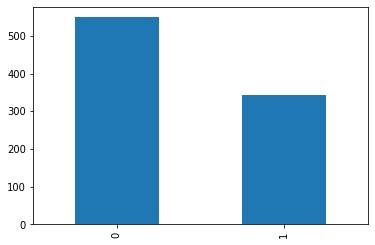

In [15]:
train["Survived"].value_counts().plot(kind="bar")
# Y-Axis shoes the number of people in each category and X-Axis denotes category("0" denotes "Died" and "1" denotes "Survived")

<AxesSubplot:xlabel='Age_bucket', ylabel='Survived'>

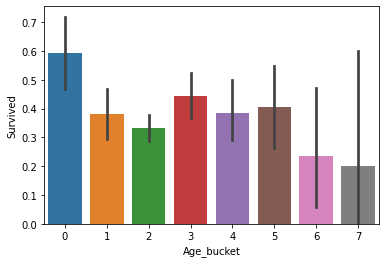

In [16]:
bin_age = [-1,10,20,30,40,50,60,70,80]
labels_age = [0,1,2,3,4,5,6,7]
train['Age_bucket']=pd.cut(train["Age"],bins = bin_age,labels=labels_age)
test['Age_bucket']=pd.cut(test["Age"],bins = bin_age,labels=labels_age)
#Here, I separated all the various age data into 8 bins of (0,1],(1,2],(2,3] and so on...
sns.barplot(x='Age_bucket', y='Survived', data=train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

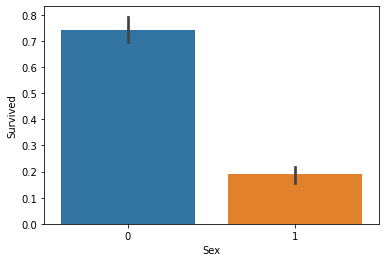

In [17]:
sns.barplot(x="Sex",y="Survived",data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

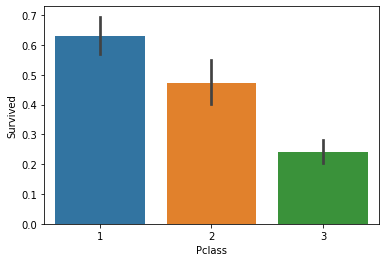

In [18]:
sns.barplot(x="Pclass",y="Survived",data=train)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

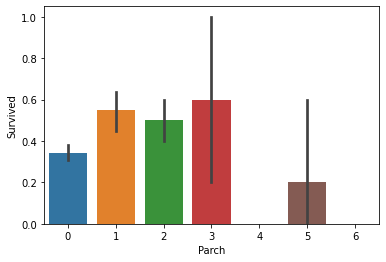

In [19]:
sns.barplot(x="Parch",y="Survived",data=train)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

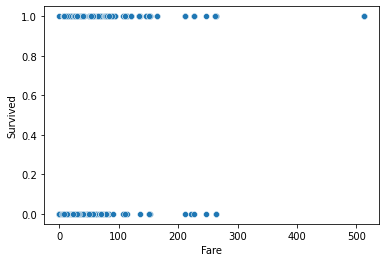

In [20]:
sns.scatterplot(x="Fare",y="Survived",data=train)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

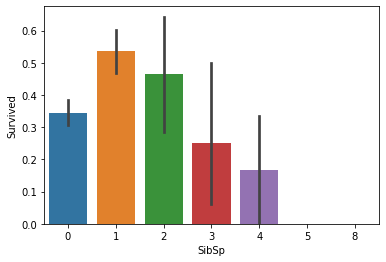

In [21]:
sns.barplot(x="SibSp",y="Survived",data=train)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bucket
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,3


In [23]:
passenger_test = test["PassengerId"]

In [24]:
train.drop(['Name','PassengerId','Age','Ticket','Cabin'],axis=1,inplace=True)
test.drop(['Name','PassengerId','Age','Ticket','Cabin'],axis=1,inplace=True)

# axis = 0 or ‘index’, 1 or ‘columns’

In [25]:
X=train.drop(["Survived"],axis=1)
y=train["Survived"]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
X.shape

(891, 7)

In [28]:
y.shape

(891,)

In [29]:
X.isnull().sum()

Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Age_bucket    0
dtype: int64

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.
#In graph form, normal distribution will appear as a bell curve.
gnb = GaussianNB()
gnb.fit(X_train,y_train)
prediction = gnb.predict(X_test)
print(accuracy_score(y_test,prediction)*100)


78.77094972067039


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
print(accuracy_score(y_test,prediction)*100)

80.44692737430168


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
prediction =knn.predict(X_test)
print(accuracy_score(y_test,prediction)*100)

73.74301675977654


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)
print(accuracy_score(y_test,prediction)*100)

82.68156424581005


In [34]:
prediction_f = rf.predict(test)

In [35]:
result_df = pd.DataFrame({"Survived":prediction_f,"PassengerId":passenger_test})
result_df.set_index('PassengerId')

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


<AxesSubplot:>

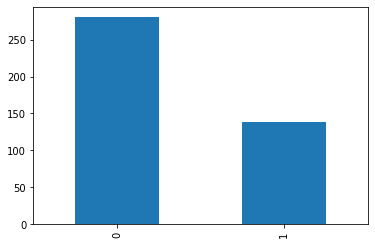

In [36]:
result_df["Survived"].value_counts().plot(kind ='bar')

In [37]:
result_df.to_csv("my_submissions",index=False)
print("Submission Successful!")

Submission Successful!
